#### 모든 데이터가 특정한 기준에 따라 자신을 대표할 대표 데이터를 선택한다. 만약 스스로가 자기 자신을 대표하게 되면 클러스터의 중심이 된다.

+ responsibility  𝑟(𝑖,  𝑘) 
    + 𝑘 번째 데이터가  𝑖 번째 데이터의 대표가 되어야 한다는 근거
+ availability  𝑎(𝑖,  𝑘) 
    + 𝑖 번째 데이터가  𝑘 번째 데이터를 대표로 선택해야 한다는 근거
+ 다음 수식을 수렴할 때까지 반복
$$r(i, k) \leftarrow s(i, k) - \max_{k' \neq k} ( a(i, k') + s(i, k'))$$

$$a(i, k) \leftarrow \min(0,  r(k, k)  + \sum_{i' \neq i, k} r(i', k))$$

여기에서  𝑠(𝑖, 𝑘) 는 다음과 같이 음의 거리로 정의되는 유사도이다.

$$s(i, k) = -|| x_i - x_k ||^2$$

특히  𝑠(𝑘, 𝑘) 는 특정한 음수 값으로 사용자가 정해 주게 되는데 이 값에 따라서 클러스터의 갯수가 달라지는 하이퍼 모수가 된다.  𝑠(𝑘,   𝑘) 가 크면 자기 자신에 대한 유사도가 커져서 클러스터의 수가 증가한다.

위 알고리즘으로 계산하는  𝑟 ,  𝑎 가 더 이상 변화하지 않고 수렴하면 계산이 종료되고 종료 시점에서  𝑟(𝑘,  𝑘)+𝑎(𝑘,  𝑘)>0 이 데이터가 클러스터의 중심이 된다.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import *

In [3]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

model = AffinityPropagation(preference=-50).fit(X)  # preference : 특정 음수값 지정. 이값에 따라 클러스터 갯수가 달라짐
cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print('Adjusted Rand Index: %0.3f' % adjusted_rand_score(labels_true, labels))
print('Adjusted Mutual Information: % 0.3f' % adjusted_mutual_info_score(labels_true, labels))
print('Silhouette Score: %0.3f' % silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Adjusted Rand Index: 0.912
Adjusted Mutual Information:  0.871
Silhouette Score: 0.753


0 r
1 g
2 b


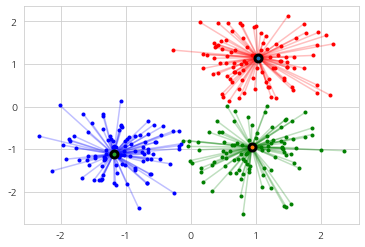

In [10]:
from itertools import cycle

colors = cycle('rgb') # iterator
for k, col in zip(range(n_clusters_), colors): # 각 클러스터별 색 다르게 설정
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    print(k, col)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)
    
plt.show()